# Importando as bibliotecas...

In [3]:
import numpy as np
import math as mt
import sympy as sp
import inspect
import re 
import altair as alt
from numpy import cos, sin, exp
import sys
import random
import time
import Funcoes.interpolacao as interpolacao
import Funcoes.solucao_de_sistemas_lineares as sistemaslineares
import pandas as pd
import matplotlib.pyplot as plt


# Ajuste de Curva

Objetivos: O objetivo desta aula é apresentar o método dos mínimos quadrados (MMQ) como
outra forma de aproximação de funções. Ao contrário do polinômio interpolador visto no
capitulo anterior, agora não é necessário que o ajuste passe exatamente por cima dos pontos
ajustados. Em outras palavras, com esse método encontramos uma função ϕ(x) de um certo
tipo pré-estabelecido (ex. reta, parábola, senoide) que melhor ajusta um conjunto de pontos
ou uma função dada. 

Como vimos na última aula, uma forma de se trabalhar com uma função definida por
uma tabela de valores é a interpolação. Contudo, a interpolação pode não ser aconselhável
quando:
1) É preciso obter um valor aproximado da função em algum ponto fora do intervalo de
tabelamento (extrapolação).
2) Os valores tabelados são resultado de experimentos físicos, pois estes valores poderão
conter erros inerentes que, em geral, não são previsíveis.
Surge então a necessidade de se ajustar a estas funções tabeladas uma função que seja
uma “boa aproximação” para as mesmas e que nos permita “extrapolar” com certa margem de
segurança. Assim, o objetivo deste processo é aproximar uma função f(x) por outra função ϕ(x),
escolhida de uma família de funções ou por uma soma de funções em duas situações distintas: 

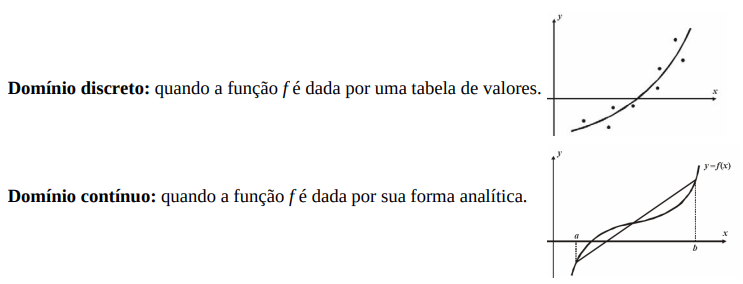

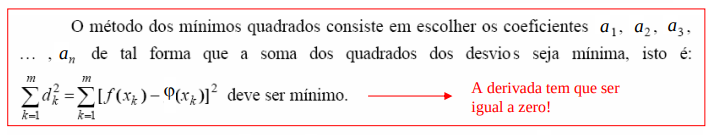

## Quadrados mínimos

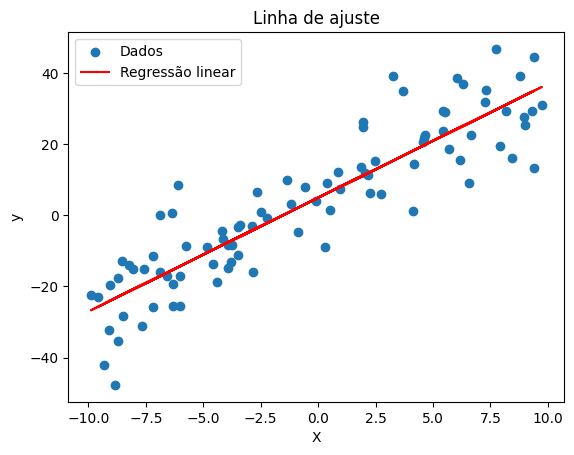

In [4]:
np.random.seed(42)
# Geração de modelo linear
amostragem = 90
X = np.random.uniform(-10, 10, size=(amostragem, 1))
coeficiente_angular = 3
valor_interceptacao = 5
y = coeficiente_angular * X + valor_interceptacao
noise = np.random.normal(0, 10, size=(amostragem, 1))
y += noise

X_b = np.c_[np.ones((amostragem, 1)), X]
# Calculos dos menores quadrados
coeficientes = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
predicao_interceptacao = coeficientes[0]
coeficiente_angular_predicao = coeficientes[1]
# geração da linha de regressão
y_pred = coeficiente_angular_predicao * X + predicao_interceptacao
# Plotagem da linha
plt.scatter(X, y, label='Dados')
plt.plot(X, y_pred, color='red', label='Regressão linear')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linha de ajuste')
plt.legend()
plt.show()

## Não Linear

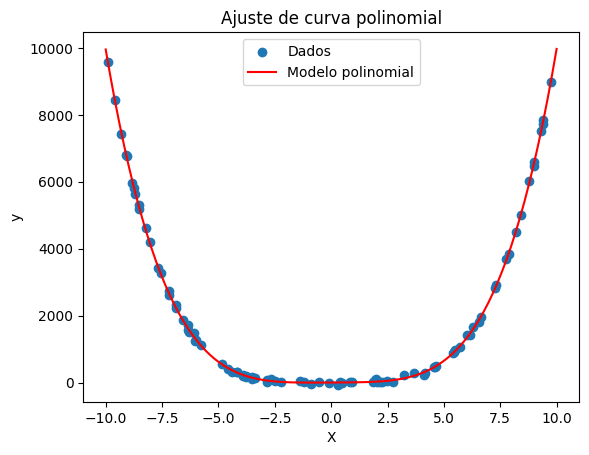

In [5]:
np.random.seed(42)

# Geração do conjunto de dados
n_samples = 90
X = np.random.uniform(-10, 10, size=(n_samples, 1))
y = X**4 + 0.73 + X
noise = np.random.normal(0, 50, size=(n_samples, 1))
y += noise

grau_polinomio = 4

# Construção das features polinomiais
X_poly = np.concatenate([X ** i for i in range(1, grau_polinomio + 1)], axis=1)

# Ajuste da curva polinomial usando mínimos quadrados
coeficientes = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)

# Geração das predições
X_pred = np.linspace(-10, 10, num=100).reshape(-1, 1)
X_pred_poly = np.concatenate([X_pred ** i for i in range(1, grau_polinomio + 1)], axis=1)
y_pred = X_pred_poly.dot(coeficientes)

# Plotagem dos dados e da curva ajustada
plt.scatter(X, y, label='Dados')
plt.plot(X_pred, y_pred, color='red', label='Modelo polinomial')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ajuste de curva polinomial')
plt.legend()
plt.show()